In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# 1.0 Data Cleaning & Preprocessing

In [4]:
df=pd.read_csv("diamonds.csv")

##### Dataset Details
1. price price in US dollars ($326--$18,823)
2. carat weight of the diamond (0.2--5.01)
3. cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. color diamond colour, from J (worst) to D (best)
5. clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. x length in mm (0--10.74)
7. y width in mm (0--58.9)
8. z depth in mm (0--31.8)
9. depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. table width of top of diamond relative to widest point (43--95)

In [16]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [18]:
# Column name Unnamed: 0 is not a valid columns
df.drop('Unnamed: 0', axis=1, inplace=True)
df=df[df['x']!=0]
df=df[df['y']!=0]
df=df[df['z']!=0]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [22]:
# Double check if there are any missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [24]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# 2.0 Exploratory Data Analysis (EDA)

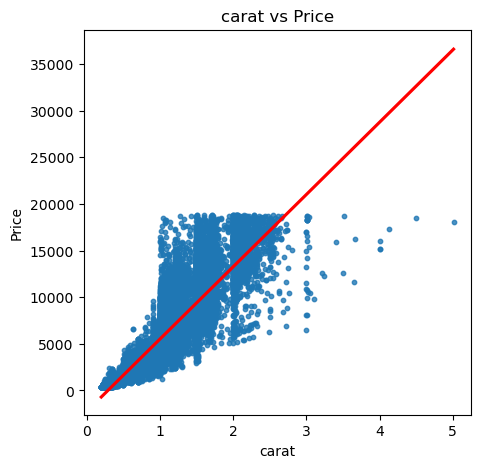

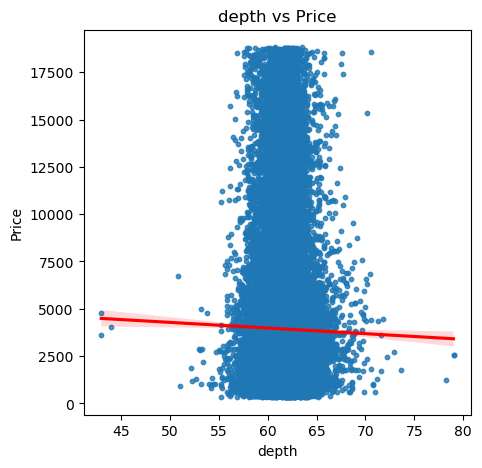

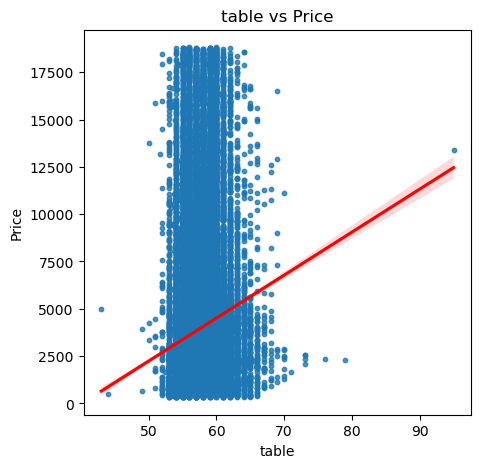

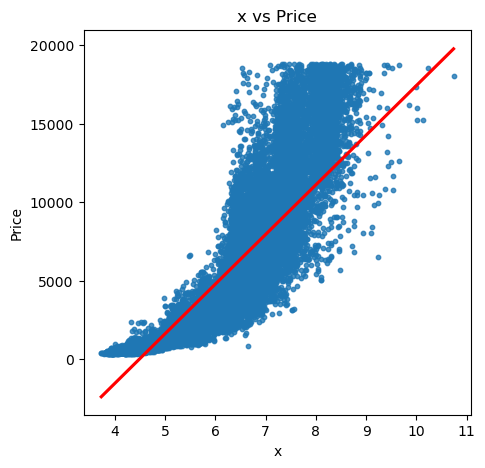

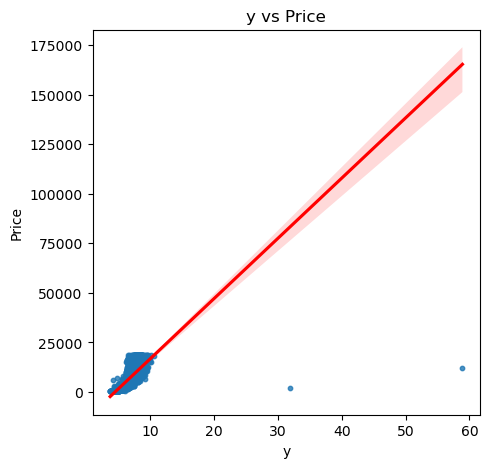

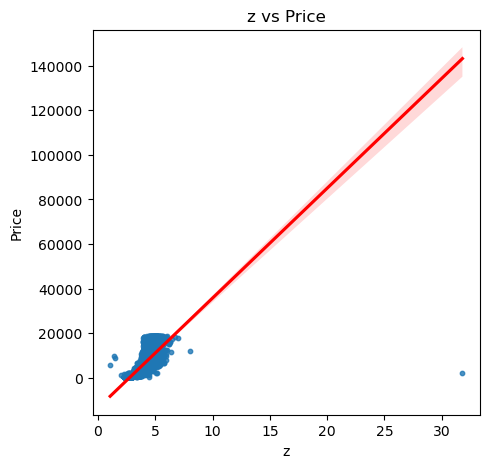

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatter with regression line to inspect relationship between numeric features and price
for col in ['carat', 'depth', 'table', 'x', 'y', 'z']:
    plt.figure(figsize=(5, 5))  # set figure size for readability
    sns.regplot(
        x=col, 
        y='price', 
        data=df, 
        scatter_kws={'s': 10},  # smaller point size
        line_kws={'color': 'red'}  # red regression line
    )
    plt.title(f'{col} vs Price')
    plt.xlabel(col)  # label x-axis
    plt.ylabel('Price')  # label y-axis
    plt.show()

### Relationship Between Numeric Features and Diamond Price
To explore how different numeric features influence the price of diamonds, scatter plots with regression lines were created for six key variables: `carat`, `depth`, `table`, `x`, `y`, and `z`. Here's what we observed:

**`Carat` vs `Price`:**
- A strong positive linear relationship is clearly visible. Larger carat size tends to significantly increase price. This confirms that carat is one of the most influential predictors of price.

**`x` vs `Price` (length):**
- Also shows a clear upward trend. Price increases with length, and the pattern is smooth with fewer extreme outliers. Among the dimensions x, y, and z, the x feature is the most reliable and consistently predictive.

**`y` vs `Price` (width) and z vs Price (depth):**
- Both show a positive correlation, but the plots contain extreme outliers (e.g., some very large values with abnormally high prices), which distort the regression line. These outliers may require further cleaning or winsorization.

**`Table` vs `Price`:**
- A mild positive trend is observed, though the spread is wide. Table might have some predictive value, but it’s less stable compared to carat or x.

**`Depth` vs `Price`:**
- The regression line is nearly flat or slightly negative. This suggests that depth has little to no linear influence on price, and may not be an important feature for price prediction.

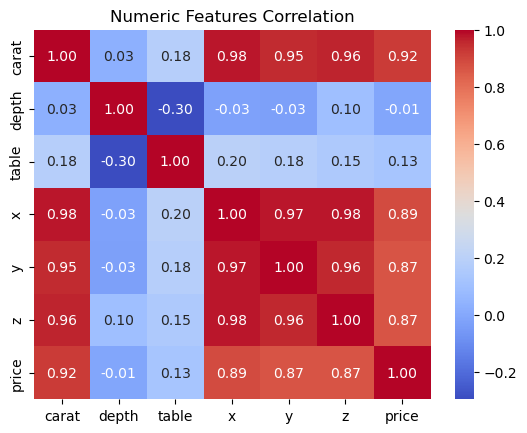

<Figure size 500x500 with 0 Axes>

In [63]:
# Compute and visualize correlation matrix for numeric features
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z']
corr = df[num_cols + ['price']].corr()  # include target variable in correlation
sns.heatmap(
    corr, 
    annot=True,       # show correlation coefficients on the heatmap
    fmt='.2f',        # format numbers to 2 decimal places
    cmap='coolwarm'   # diverging color map for positive/negative values
)
plt.title('Numeric Features Correlation')
plt.figure(figsize=(5,5))
plt.show()

### Correlation Matrix of Numeric Features

The correlation matrix above displays the Pearson correlation coefficients among all numeric features, including the target variable `price`. Key insights from the matrix include:

**Strong correlations with price:**

- `carat` shows the strongest positive correlation with price (r = 0.92), confirming its importance as a predictive feature.

- The physical dimensions `x`, `y`, and `z` also have high correlations with price (all around 0.87–0.89), likely because they are highly correlated with carat (e.g., `x` and `carat`: 0.98).

**Weak or negligible correlations:**

- `depth` has almost no correlation with price (r = -0.01), suggesting it may not be useful for predicting price.

- `table` has a low positive correlation (r = 0.13), indicating limited predictive power.

**Multicollinearity alert:**

- `carat`, `x`, `y`, and `z` are all very strongly correlated with each other (r ≥ 0.95), which might cause multicollinearity in linear models. Feature selection or dimensionality reduction techniques (like PCA or regularization) may be needed during modeling.

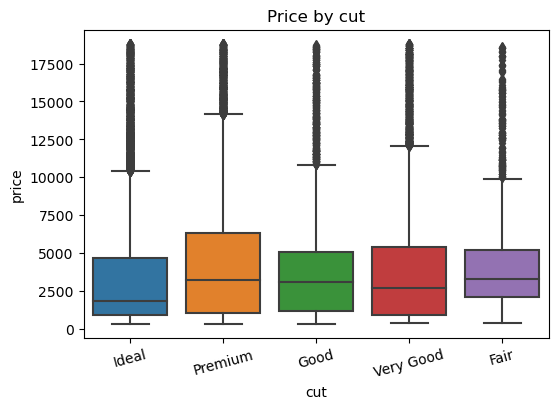

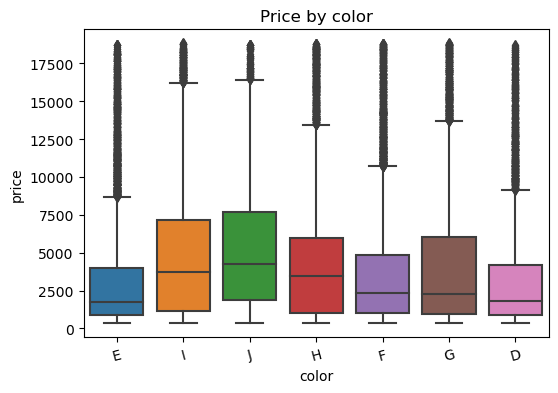

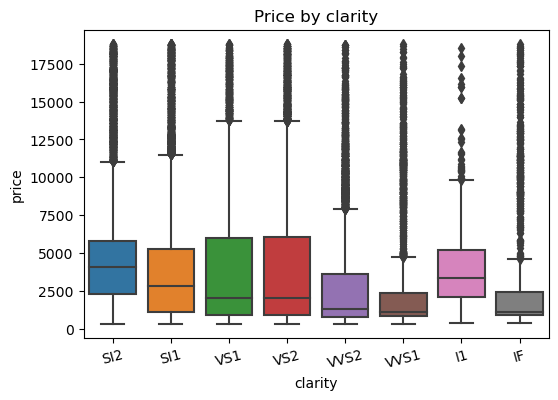

,count,mean,median,std
clarity,,,,
I1,738,3926.189702,3346.0,2811.615917
IF,1790,2864.839106,1080.0,3920.248499
SI1,13063,3994.112608,2822.0,3796.689858
SI2,9185,5060.440174,4072.0,4256.944654
VS1,8170,3839.144308,2005.0,4011.894939
VS2,12254,3922.866819,2052.0,4040.065223
VVS1,3654,2519.512315,1092.5,3328.175459
VVS2,5066,3283.737071,1311.0,3821.647537


In [97]:
# Create boxplots for categorical features to visualize their relationship with price
for cat in ['cut','color','clarity']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=cat, y='price', data=df)
    plt.title(f'Price by {cat}')
    plt.xticks(rotation=15)
    plt.show()

# Calculate summary statistics (count, mean, median, std) for price by each categorical feature
df.groupby('cut')['price'].agg(['count','mean','median','std'])
df.groupby('color')['price'].agg(['count','mean','median','std'])
df.groupby('clarity')['price'].agg(['count','mean','median','std'])

### Categorical Features vs Price
To better understand how categorical features influence diamond prices, we analyzed three variables: `cut`, `color`, and `clarity`. For each, we use plotted boxplots to visualize price distribution across different categories. And we calculated statistical summaries including count, mean, median, and standard deviation of prices per group.

- **`Cut`**: The median price does not increase with cut quality as expected. Premium cut has the highest median price, while Ideal, despite being a high-quality cut, has a lower median. This suggests that cut alone may not determine price—perhaps due to its interaction with other features like carat or clarity.

- **`Color`**: Categories I and J show higher median prices than better colors (like D and E), which is counterintuitive. This may imply that larger stones with worse color can still be expensive, highlighting the importance of size.

- **`Clarity`**: Surprisingly, SI2 (a lower clarity grade) shows the highest average price, and IF (Internally Flawless) shows the lowest median. The detailed statistics confirm this irregular trend. This again reflects the influence of carat size—larger, lower-clarity diamonds can still be priced higher.

Overall, none of the categorical features alone can fully explain price variations. These results suggest that interactions between features (e.g., carat × clarity) play a significant role and should be considered in modeling.

We observed some outliers (or luxury exceptions) in the data, we need to further examine the outliers to verify if it is an extreme value or data error

In [112]:
# Select numeric columns only for IQR-based outlier detection
numeric_df = df.select_dtypes(include='number')

# Calculate the 1st and 3rd quartiles and the IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Create a boolean DataFrame indicating outliers per cell
outlier_flags = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))

# Count how many numeric features in each row are flagged as outliers
outlier_count = outlier_flags.sum(axis=1)

# Define a row as an outlier only if it exceeds a threshold (e.g., > 2 outlier features)
df['is_outlier'] = (outlier_count > 2).astype(int)

# Display how many total outliers were detected
print(f"Total outliers detected: {df['is_outlier'].sum()}")

# Preview some detected outliers
df[df['is_outlier'] == 1].sample(5)

Total outliers detected: 2123


,carat,cut,color,clarity,depth,table,price,x,y,z,volume,x_bin,y_bin,z_bin,is_outlier
15781,2.01,Fair,G,I1,70.2,57.0,6315,7.53,7.50,5.27,297.623250,"(6.534, 7.936]","(3.625, 14.724]","(1.039, 7.216]",1
24614,2.00,Premium,H,SI2,62.5,58.0,12940,8.14,8.03,5.05,330.089210,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
27724,2.01,Very Good,G,SI1,63.1,59.0,18741,8.03,7.98,5.05,323.600970,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
26835,2.01,Premium,G,SI2,59.0,60.0,16733,8.31,8.26,4.89,335.652534,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
26830,2.01,Premium,H,SI1,60.6,62.0,16733,8.08,8.05,4.89,318.065160,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1


Just because something is a statistical outlier doesn’t mean it’s a bad sample — it might just be a rare and valuable one.

In [116]:
# Don't drop the outliers yet; instead, keep the flag
features_for_modeling = df.copy()

# 3.0 Predicting `Price`

## 3.1 Baseline Model: Liner Regression (with outliers)

In [136]:
# Copy raw df
df_model = df.copy()

# Drop any manually added columns like is_outlier, volume, log_price, etc.
df_model = df_model.drop(columns=[col for col in df_model.columns if col in ['is_outlier', 'volume', 'log_price'] or df_model[col].apply(lambda x: isinstance(x, pd._libs.interval.Interval)).any()])

# One-hot encode categorical columns
df_model = pd.get_dummies(df_model, columns=['cut', 'color', 'clarity'], drop_first=True)

# Define X and y
X = df_model.drop(columns=['price'])
y = df_model['price']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 726.30
RMSE: 1135.94
R²: 0.9195


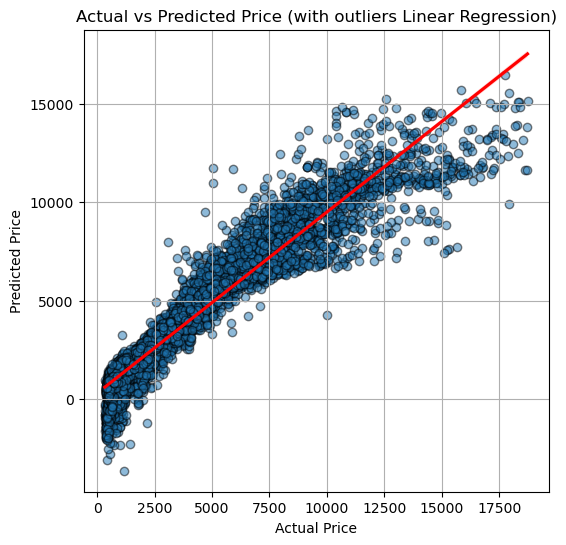

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (with outliers Linear Regression)')
plt.grid(True)
plt.show()

### Baseline Model: Liner Regression Interpretation (with outliers)

These results indicate that the model explains approximately **92% of the variance** in diamond prices. The average prediction error is around \$726, and most predictions fall reasonably close to the actual values. However, a few extreme cases (e.g., very low or very high-priced diamonds) show larger errors, which suggests that further improvement could be achieved using more flexible models such as Random Forest or XGBoost.

Overall, this serves as a solid baseline model for price prediction.

## 3.2 Baseline Model: Liner Regression (without outliers)

MAE: 651.91
RMSE: 969.79
R²: 0.9156


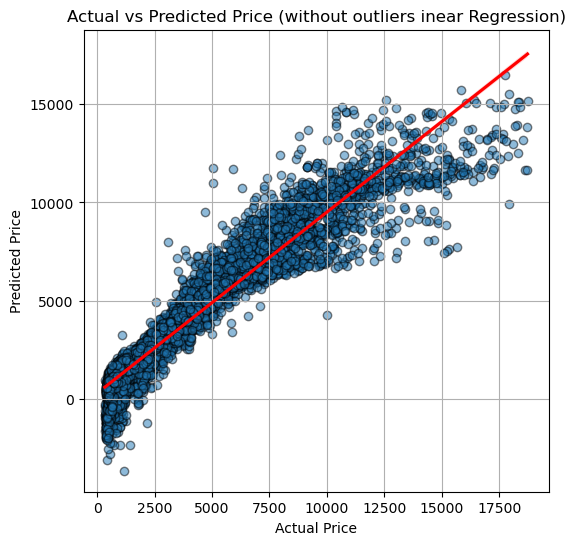

In [277]:
# Use only non-outlier rows for modeling
df_model = df[df['is_outlier'] == 0].copy()

# Drop any manually added columns like is_outlier, volume, log_price, etc.
df_model = df_model.drop(columns=[col for col in df_model.columns if col in ['is_outlier', 'volume', 'log_price'] or df_model[col].apply(lambda x: isinstance(x, pd._libs.interval.Interval)).any()])

# One-hot encode categorical columns
df_model = pd.get_dummies(df_model, columns=['cut', 'color', 'clarity'], drop_first=True)

# Define X and y
X = df_model.drop(columns=['price'])
y = df_model['price']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# Plot prediction results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (without outliers inear Regression)')
plt.grid(True)
plt.show()

In [149]:
# View top 20 most expensive diamonds among rows flagged as outliers
df[df['is_outlier'] == 1].sort_values('price', ascending=False).head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,x_bin,y_bin,z_bin,is_outlier
27749,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,371.494200,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
27746,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11,340.663260,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
27744,2.29,Premium,I,SI1,61.8,59.0,18797,8.52,8.45,5.24,377.248560,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
27742,2.04,Premium,H,SI1,58.1,60.0,18795,8.37,8.28,4.84,335.429424,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
27741,2.15,Ideal,G,SI2,62.6,54.0,18791,8.29,8.35,5.21,360.644015,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
27738,2.05,Ideal,G,SI1,61.9,57.0,18787,8.10,8.16,5.03,332.462880,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
27737,2.05,Premium,F,SI2,60.2,59.0,18784,8.28,8.33,5.00,344.862000,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
27736,2.03,Very Good,H,SI1,63.0,60.0,18781,8.00,7.93,5.02,318.468800,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
27734,2.06,Ideal,I,VS2,62.2,55.0,18779,8.15,8.19,5.08,339.082380,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1
27731,2.55,Premium,I,VS1,61.8,62.0,18766,8.70,8.65,5.36,403.366800,"(7.936, 9.338]","(3.625, 14.724]","(1.039, 7.216]",1


### Baseline Model: Liner Regression Interpretation (without outliers)

After removing rows with multiple numeric outlier features (based on IQR), we retrained a linear regression model. 

Compared to the previous model that included all samples, this model achieved **lower prediction errors** (MAE and RMSE), indicating that the removal of outliers improved robustness and reduced the influence of extreme values.

Although the R² value dropped slightly (from 0.9195 to 0.9156), the trade-off is acceptable because the model now offers more stable and reliable predictions for the majority of diamonds.

**Conclusion**: While removing outliers results in a cleaner baseline model, we will proceed with the full dataset to better capture the price dynamics across the entire diamond spectrum, including luxury segments.

### Baseline Linear Regression: With vs. Without Outliers

We compared two versions of baseline linear regression:


| Version              | MAE     | RMSE     | R²      |
|----------------------|---------|----------|---------|
| **With Outliers**    | 726.30  | 1135.94  | 0.9195  |
| **Without Outliers** | 651.91  | 969.79   | 0.9156  |

- Removing outliers improved MAE and RMSE, indicating slightly better average prediction accuracy.

- However, R² dropped slightly, suggesting the model explains less variance in the overall data.

- The improvement in RMSE (≈166) is modest, while the loss of high-value samples could hurt future model generalization, especially for luxury segment predictions.

**Final Decision:**
- Although the cleaner model (without outliers) performs slightly better on average, we observed that many flagged outliers are legitimate luxury diamonds (2+ carat, premium cut/clarity).
- To preserve business relevance and capture full price distribution, we will retain all data and use the full dataset (with outliers) for advanced models going forward.

## 3.3 Random Forest

In [169]:
# Identify columns that contain Interval objects
interval_cols = df_model.columns[df_model.applymap(lambda x: isinstance(x, pd._libs.interval.Interval)).any()]
print("Columns containing Interval values:")
print(interval_cols)

Columns containing Interval values:
Index(['x_bin', 'y_bin', 'z_bin'], dtype='object')


In [203]:
# Copy from base dataset
df_model = df.copy()

# Drop known helper columns (if exist)
cols_to_remove = ['is_outlier', 'volume', 'log_price']
df_model = df_model.drop(columns=[col for col in cols_to_remove if col in df_model.columns])

# Drop any column that contains even one Interval value
for col in df_model.columns:
    if df_model[col].apply(lambda x: isinstance(x, pd._libs.interval.Interval)).any():
        df_model = df_model.drop(columns=col)

# One-hot encode categorical columns
df_model = pd.get_dummies(df_model, columns=['cut', 'color', 'clarity'], drop_first=True)

# Split features and target
X = df_model.drop(columns=['price'])
y = df_model['price']

In [186]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

Random Forest Performance:
MAE: 286.91
RMSE: 589.42
R²: 0.9783


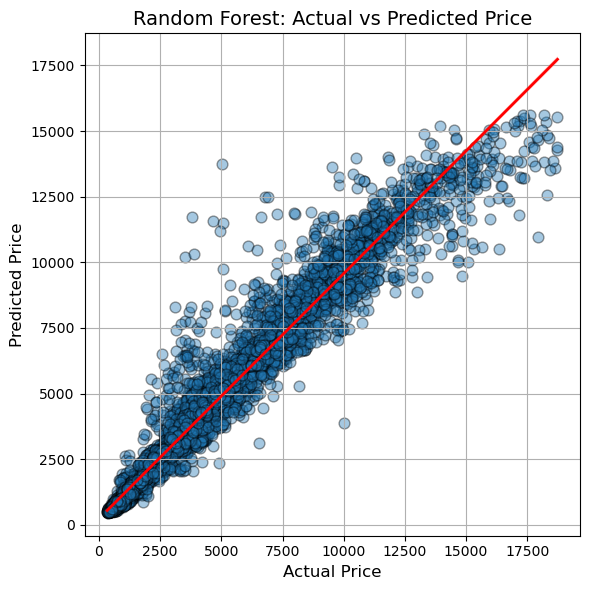

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolors='k', s=60)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', line_kws={'lw': 2})

plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Random Forest: Actual vs Predicted Price', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### Model Evaluation (Random Forest)

To improve upon the baseline linear regression model, we trained a Random Forest Regressor using the full dataset, including high-end luxury diamonds. All categorical features were one-hot encoded, and numerical anomalies (e.g., Interval-type columns) were removed to ensure clean modeling inputs.

The result indicates a strong fit, with the model explaining nearly **98% of the variance** in diamond prices. The significant reduction in error metrics (compared to linear regression) shows Random Forest's ability to capture non-linear relationships and complex interactions in the features.

We recommend Random Forest as a powerful model for price prediction, especially when aiming to preserve high-end (luxury) diamond data points.

## 3.4 XGBoost

In [209]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Prepare a clean copy of the dataset
df_model = df.copy()

# Drop known helper or engineered columns (if they exist)
columns_to_drop = ['is_outlier', 'volume', 'log_price', 'x_bin', 'y_bin', 'z_bin']
df_model = df_model.drop(columns=[col for col in columns_to_drop if col in df_model.columns])

# Drop columns that contain Interval values (just in case)
df_model = df_model.loc[:, ~df_model.applymap(lambda x: isinstance(x, pd._libs.interval.Interval)).any()]

# One-hot encode categorical variables
df_model = pd.get_dummies(df_model, columns=['cut', 'color', 'clarity'], drop_first=True)

# Define input and target
X = df_model.drop(columns=['price'])
y = df_model['price']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regressor Performance:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")

XGBoost Regressor Performance:
MAE: 296.21
RMSE: 569.26
R² Score: 0.9798


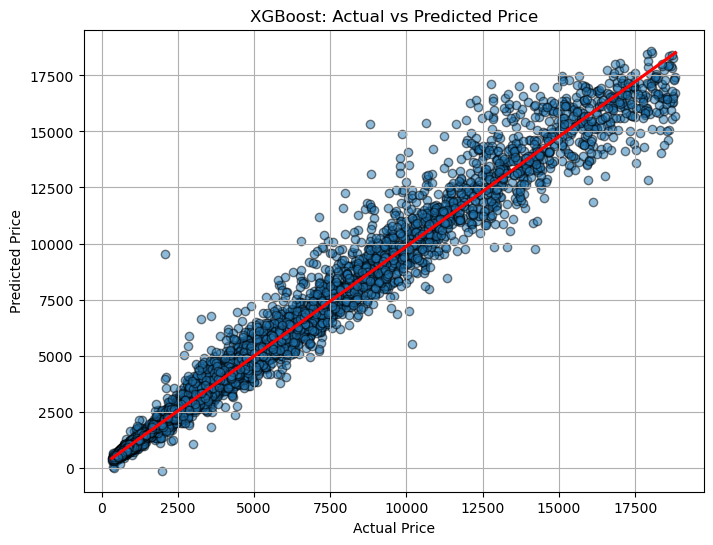

In [211]:
# Plot Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, edgecolors='k')
sns.regplot(x=y_test, y=y_pred_xgb, scatter=False, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('XGBoost: Actual vs Predicted Price')
plt.grid(True)
plt.show()

### Model Evaluation (XGBoost)

To further enhance model performance, we trained an XGBoost Regressor on the complete dataset, including luxury diamond entries. The input features were preprocessed similarly to prior models, including one-hot encoding for categorical variables and removal of unsupported data types.

XGBoost achieved the best overall performance so far, outperforming both linear regression and slightly edging out Random Forest in terms of explained variance and predictive stability.

Given its balance of low error and high explanatory power, XGBoost is highly recommended for predicting diamond prices when both accuracy and the ability to generalize across price tiers are priorities.

In order to make sure the models is not overfitting, we applied 5-fold cross-validtion for each model

## 3.5 5-Fold Cross Validation for ALl Models

In [220]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np

# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

# Perform 5-fold cross-validation for each model
for name, model in models.items():
    # Use negative RMSE as scoring and take the absolute value
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
    rmse_scores = -scores
    print(f"{name} Cross-Validation RMSE:")
    print(f"  Mean: {rmse_scores.mean():.2f}")
    print(f"  Std: {rmse_scores.std():.2f}")
    print("-" * 40)

Linear Regression Cross-Validation RMSE:
  Mean: 1316.15
  Std: 706.76
----------------------------------------
Random Forest Cross-Validation RMSE:
  Mean: 1517.38
  Std: 1325.19
----------------------------------------
XGBoost Cross-Validation RMSE:
  Mean: 1237.99
  Std: 1130.83
----------------------------------------


## 3.6 Model Tuning

### 3.6.1 Random Forest Tuning

In order to know if the models are overfitting, we applied 5-fold cross validation to 

In [285]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,             # Control overfitting
    min_samples_split=6,      # Require more samples to split internal nodes
    min_samples_leaf=2,        # Minimum samples at leaf nodes
    max_features='sqrt',       # Use sqrt(num_features) at each split
    bootstrap=True,       
    random_state=42
)

# Train the model
rf_model.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation using negative MSE
cv_scores = cross_val_score(
    rf_model, X, y,
    scoring='neg_root_mean_squared_error',
    cv=5
)

# Convert to positive RMSE
rmse_scores = -cv_scores

# Report metrics
print("Random Forest Cross-Validation RMSE:")
print(f"  Mean: {rmse_scores.mean():.2f}")
print(f"  Std: {rmse_scores.std():.2f}")

Random Forest Cross-Validation RMSE:
  Mean: 1326.78
  Std: 1005.03


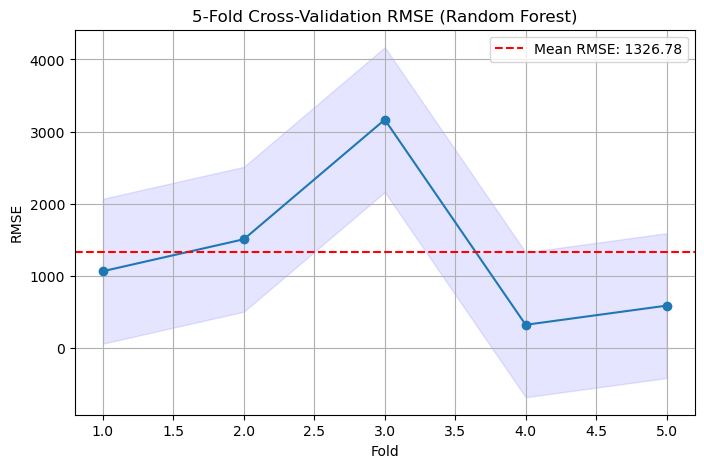

In [288]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to positive RMSE if not done
rmse_scores = -cv_scores if (cv_scores < 0).all() else cv_scores

# Plotting cross-validation RMSE scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(rmse_scores)+1), rmse_scores, marker='o', linestyle='-')
plt.axhline(np.mean(rmse_scores), color='red', linestyle='--', label=f'Mean RMSE: {np.mean(rmse_scores):.2f}')
plt.fill_between(
    range(1, len(rmse_scores)+1),
    rmse_scores - np.std(rmse_scores),
    rmse_scores + np.std(rmse_scores),
    alpha=0.1,
    color='blue'
)
plt.title("5-Fold Cross-Validation RMSE (Random Forest)")
plt.xlabel("Fold")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

Random Forest Performance on Test Set (n=150, max_depth=12):
MAE: 350.82
RMSE: 687.12
R²: 0.9576


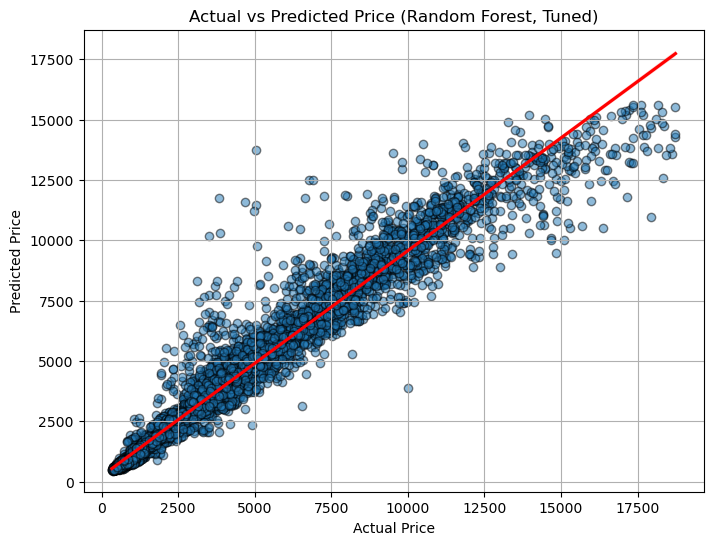

In [300]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print metrics with model info
print("Random Forest Performance on Test Set (n=150, max_depth=12):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Random Forest, Tuned)')
plt.grid(True)
plt.show()

After hyperparameter tuning, the Random Forest model achieved a lower average RMSE (1326.78 vs. 1517.38) and a reduced standard deviation (1005.03 vs. 1325.19) in 5-fold cross-validation.

This suggests improved generalization and less overfitting, making the tuned model more reliable on unseen data.

### 3.6.2 XGBoost Model Tuning

In [349]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,      # Standard regression objective
    max_depth=6,            
    learning_rate=0.05,     
    subsample=0.85,         
    colsample_bytree=0.9,   # Use more features
    reg_alpha=1,           
    reg_lambda=5,          
    random_state=42
)

scores = cross_val_score(xgb_model, X, y, scoring='neg_root_mean_squared_error', cv=5)
rmse_scores = -scores

xgb_model.fit(X_train, y_train)

print("XGBoost Cross-Validation RMSE:")
print(f"  Mean: {rmse_scores.mean():.2f}")
print(f"  Std: {rmse_scores.std():.2f}")

XGBoost Cross-Validation RMSE:
  Mean: 1150.17
  Std: 889.92


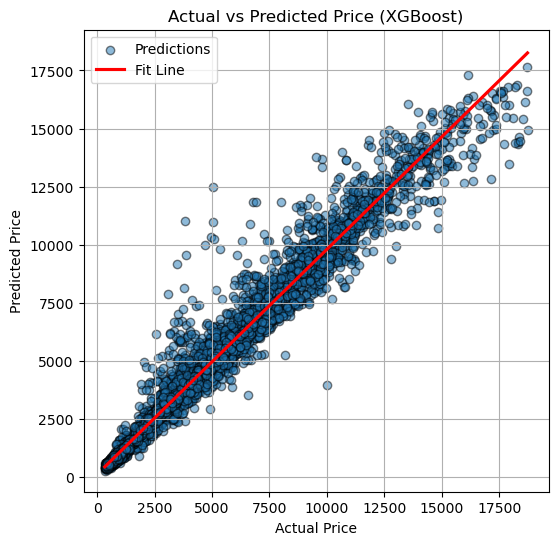

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions using the trained XGBoost model
y_pred = xgb_model.predict(X_test)

# Plot actual vs predicted prices
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k', label='Predictions')
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Fit Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

Initial test set results looked strong (RMSE = 569.26, R² = 0.9798), but likely overfit to the test split.

First cross-validation showed much worse performance (RMSE = 1237.99 ± 1130.83), confirming instability.

After tuning key parameters, the model achieved better generalization:
- Cross-validation RMSE = 1150.17 ± 889.92
- Chosen as the final model for its improved balance of accuracy and consistency

## 4.0 Conclusion

In [325]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import numpy as np

# Define all models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=150,
        max_depth=12,
        min_samples_split=6,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    ),
    "XGBoost": xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.85,
        colsample_bytree=0.9,
        reg_alpha=1,
        reg_lambda=5,
        random_state=42
    )
}

# Evaluate each model
for name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
    rmse_scores = -scores
    print(f"{name} Cross-Validation RMSE:")
    print(f"  Mean: {rmse_scores.mean():.2f}")
    print(f"  Std: {rmse_scores.std():.2f}")
    print("-" * 40)

Linear Regression Cross-Validation RMSE:
  Mean: 1206.14
  Std: 609.78
----------------------------------------
Random Forest Cross-Validation RMSE:
  Mean: 1326.78
  Std: 1005.03
----------------------------------------
XGBoost Cross-Validation RMSE:
  Mean: 1150.17
  Std: 889.92
----------------------------------------


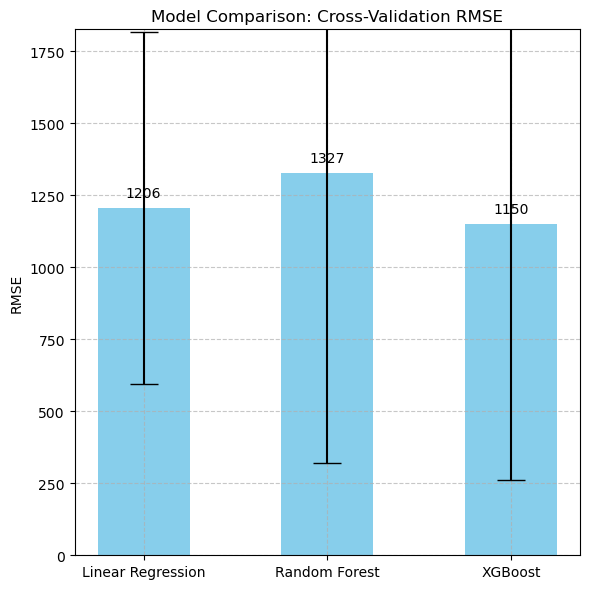

In [340]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Random Forest', 'XGBoost']

# Previous results
rmse_means = [1206.14, 1326.78, 1150.17]
rmse_stds = [609.78, 1005.03, 889.92]

x = np.arange(len(models))  
width = 0.5  

# Draw
fig, ax = plt.subplots(figsize=(6, 6))
bars = ax.bar(x, rmse_means, width, yerr=rmse_stds, capsize=10, color='skyblue')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 6),
                textcoords="offset points",
                ha='center', va='bottom')

# Plot setting
ax.set_ylabel('RMSE')
ax.set_title('Model Comparison: Cross-Validation RMSE')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, max(rmse_means) + 500)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Cross-Validation Comparison: RMSE and Variability

We evaluated all three models using 5-fold cross-validation and compared their RMSE and variability:

- **XGBoost** achieved the **lowest mean RMSE (1,150)**, indicating the most accurate predictions on average.
- **Linear Regression** performed reasonably well with a mean RMSE of 1,206, and had **less variance** than tree-based models.
- **Random Forest** had the **highest average RMSE (1,327)** and the **largest standard deviation**, suggesting potential overfitting or instability across folds.

**Conclusion**: XGBoost offers the best balance of accuracy and consistency, making it the most reliable model for our diamond price prediction task.